In [1]:
#Import libraries
import pandas as pd
import sys
sys.path.append('../../') 

from predictions import prediction

#Read variable excel
variables_df = pd.read_csv('variables_df.csv', index_col=[0])

#Extract variables
variables_dict = variables_df.to_dict()['0']
batch_size = int(variables_dict['batch_size_valid'])
window_size = int(variables_dict['window_size'])
sentiment = bool(variables_dict['sentiment'])
sentiment_type = variables_dict['sentiment_type']
ticker = variables_dict['ticker']
excel_reports = variables_dict['excel_reports']
entry_candle = variables_dict['entry_candle']
model_name = variables_dict['model_name']
indicator1 = int(variables_dict['indicator1'])
indicator2 = int(variables_dict['indicator2'])
indicator3 = int(variables_dict['indicator3'])
aggr_function = variables_dict['aggr_function']
condition = bool(variables_dict['condition'])
period = variables_dict['period']
formation_window = int(variables_dict['formation_window'])
acceptance = float(variables_dict['acceptance'])
penalization = float(variables_dict['penalization'])

# Read excels
x_test = pd.read_csv(f'{ticker}_test_data.csv', index_col=[0])
x_test_x = pd.read_csv(f'{ticker}_x_test_x.csv', index_col=[0])
news_df = pd.read_excel(
                f'{ticker}_sentiment_analysis_final.xlsx', index_col=[0])
Dates = pd.read_csv(f'{ticker}_Dates.csv', index_col=[0])
Dates = Dates.iloc[:, 0]

#Run it
performance_df = prediction()
performance_df

33/33 [==============================] - 4s 65ms/step
--------> GetTensoredDataset completed

--------> ReverseNormalization completed

--------> GetFinalDataframe



,Open,High,Low,Close,EMA5,EMA8,EMA21,labels,prediction,TwitterSentiment,Datetime
In,,,,,,,,,,,
0,29.330000,30.490000,26.780001,28.160000,28.544416,28.474928,29.741243,nn,nn,0.1381,2023-01-23
1,27.719999,31.170000,27.530001,30.320000,29.136277,28.884944,29.793857,nn,nn,0.1400,2023-01-30
2,29.549999,29.650000,27.340000,27.799999,28.690851,28.643845,29.612597,nn,nn,0.1399,2023-02-06
3,27.870001,28.879999,27.379999,27.610001,29.136277,28.884944,29.793857,28.879999,30.067099,0.0000,2023-02-07
4,41.689999,44.549999,41.099998,44.549999,44.002067,44.628530,46.809762,nn,nn,0.0936,2022-05-23
...,...,...,...,...,...,...,...,...,...,...,...
127,46.130001,49.049999,46.049999,48.730000,48.256667,47.953334,47.540414,49.049999,49.262123,0.0000,2019-01-22
128,58.000000,59.130001,57.790001,58.049999,57.182846,56.126506,53.158670,nn,nn,0.0000,2019-11-25
129,58.549999,58.689999,55.750000,56.810001,57.058565,56.278394,53.490609,nn,nn,0.0000,2019-12-02


In [3]:
from final_evaluation import GetModelPerformance

print(f"ticker: {str.upper(ticker)}\n")
#print("entry candle: ",entry_candle)

GetModelPerformance = GetModelPerformance()

GetModelPerformance.fit(acceptance=acceptance,
                            penalization=penalization,
                            entry_candle=entry_candle,  # Current Open
                            budget=10000,
                            window_size=window_size,
                            export_excel=False,
                            excel_path=excel_reports,
                            sentiment=sentiment)

trades_df = GetModelPerformance.transform(performance_df)



ticker: INTC

entry candle:  Current Open
Formations:  33
period: 2023-01-23 - 2019-12-09
Entry Candle:  Current Open

Total Trades:  15
Profit Trades:  11
Loss Trades:  4

Win Ratio: 73.0 %
Loss Ratio: 27 %

Trade nr with exact TP:  7
Ratio of exact TP: 46.67 %

Average profit per trade:  227

Gross profit:  3398
Gross loss:  -1462

Net profit:  1936


In [3]:
from final_evaluation import GetPerformanceReport

GetPerformanceReport = GetPerformanceReport()

GetPerformanceReport.fit(entry_candle=entry_candle,
                             budget=10000,
                             window_size=window_size,
                             export_excel=False,
                             excel_path=excel_reports)

trades_df_final = GetPerformanceReport.transform(trades_df)

--------> GetPerformanceReport completed



<Figure size 1600x640 with 0 Axes>

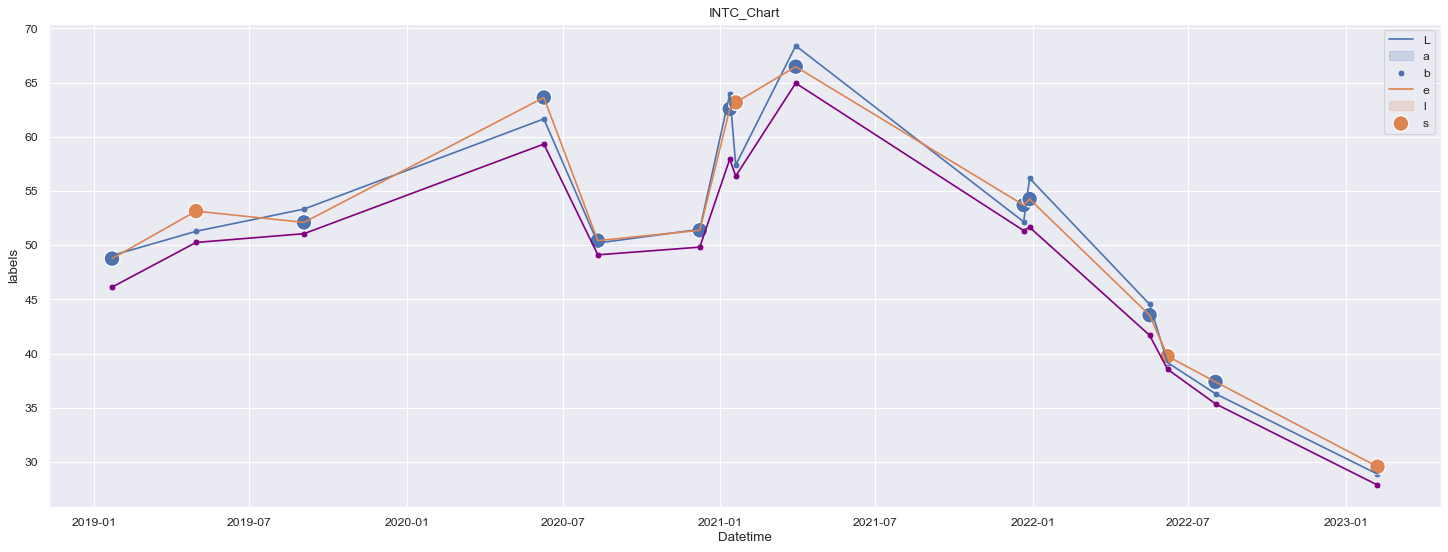

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings


warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
figure(figsize=(20, 8), dpi=80)

df_plot = trades_df_final[['Datetime','labels','prediction','Entry','profit']]
df_plot = df_plot[df_plot.labels != 'nn']
df_plot['loss'] = df_plot['profit'].apply(lambda x: 1 if x < 0 else 0)

import seaborn as sns
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
figure(figsize=(20, 8), dpi=80)

line_labels = sns.lineplot(x='Datetime', 
                    y='labels', 
                    data=df_plot)

scatter_labels = sns.scatterplot(x='Datetime', 
                    y='labels', 
                    data=df_plot)

line_prediction = sns.lineplot(x='Datetime', 
                    y='prediction', 
                    data=df_plot,palette="cool")

scatter_prediction = sns.scatterplot(x='Datetime', 
                    y='prediction', 
                    data=df_plot,hue=df_plot.loss,s=200)

line_entry = sns.lineplot(x='Datetime', 
                    y='Entry', 
                    data=df_plot,color='purple')

scatter_entry= sns.scatterplot(x='Datetime', 
                    y='Entry', 
                    data=df_plot,color='purple')                



plt.xticks(rotation=0)
plt.legend('Labels')
plt.title(f'{str.upper(ticker)}_Chart')
plt.annotate("Iris Dataset", (3, 5), fontsize=50)
plt.show()
#plt.tight_layout()
#df_plot

In [5]:
# variables_df

In [7]:
from final_evaluation import MakeSinglePrediction

MakeSinglePrediction = MakeSinglePrediction()

fit_output = MakeSinglePrediction.fit(
                        model_name=model_name,
                        form_window=formation_window,
                        ticker=ticker,
                        start_date="2019-03-18",
                        end_date="2023-03-12",
                        interval=period, #1wk
                        progress=False,
                        condition=condition,
                        timeperiod1=indicator1,
                        timeperiod2=indicator2,
                        timeperiod3=indicator3,
                        debug=False,
                        budget=13500,
                        penalization=penalization,
                        acceptance=acceptance,
                        entry_candle='Current Close',
                        news_df=news_df,
                        sentiment=sentiment,
                        sentiment_type=sentiment_type,
                        sentiment_aggr=aggr_function)

#fit method outputs tuple, get only trade formation out of tuple
trade_formation = fit_output[1]
final_trade_formation = trade_formation.tail(formation_window)
final_trade_formation
###IMPORTANT!!!!
#trade_formation dataframe must be checked before transformation, sometimes df pulled via yahoo finance 
# is shifted, and trade formation does not have entire formation in itself. in this case there must 
# be changed end_date in fit method
final_trade_formation



Trading condition passed, you can make prediction

Entry price:  27.22


,Date,Open,High,Low,Close,EMA5,EMA8,EMA21,TwitterSentiment
1,2023-02-20,27.110001,27.27,24.920000,25.139999,27.267045,27.686524,29.040494,0.124721
2,2023-02-27,25.549999,26.48,24.730000,26.400000,26.978030,27.400629,28.800449,0.114329
3,2023-03-06,26.469999,27.52,25.450001,27.219999,27.058686,27.360489,28.656771,0.127143


In [37]:
from datetime import datetime

def GetDay(df):
    for date in reversed(list(df['Date'])):
        #print(date)
        date2 = date.to_pydatetime()
        day = date2.strftime('%A')
        #print(day)
        if day == "Monday":
            revised_df = df.iloc[1:,:]
            break
        else:
            revised_df = df.iloc[:-1,:]
            break
    return revised_df

d = GetDay(trade_formation)
d
    

,Date,Open,High,Low,Close,EMA5,EMA8,EMA21,TwitterSentiment
1,2023-02-20,27.110001,27.27,24.920000,25.139999,27.267045,27.686524,29.040494,0.124721
2,2023-02-27,25.549999,26.48,24.730000,26.400000,26.978030,27.400629,28.800449,0.114329
3,2023-03-06,26.469999,27.52,25.450001,27.219999,27.058686,27.360489,28.656771,0.127143



Ticker:  intc
1/1 [==============================] - 2s 2s/step

Entry candle (Current Close)

Budget:  13500

Entry price:  27.22
Prediction:  26.79
Expected Market move:  -0.43
Expected Profit:  -215.09


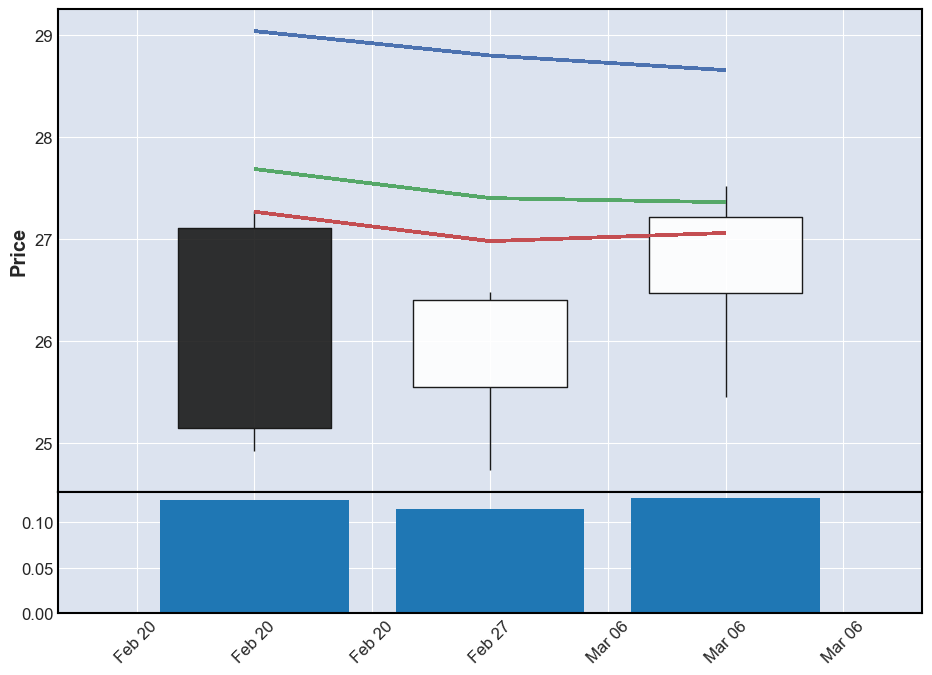

In [6]:
#Make prediction
MakeSinglePrediction.transform(final_trade_formation)

#PLot current chart and sentiment
from plotting import PlotCurrentFormation

PlotCurrentFormation(final_trade_formation,sentiment=sentiment,indicator1=indicator1,indicator2=indicator2,indicator3=indicator3)
